# 6.832 FP: Ankle Walker

Albert Wu

## Model
The (planar) ankle walker consists of a body with mass $m_b$ and 2 feet with mass $m_f$, with the connection between each foot and the body being a single (actuated, torque-controlled) pin joint, and the leg being springy with controllable spring constant.

<p align="center">
  <img src="./planar_hopper.png" width="350"/>
</p>

The planar ankled walker has state

$$ \mathbb{x} = \left[ \begin{array} \\ q \\ \dot q \end{array}\right] \ \ \ q = \left[\begin{array}\\ x \\ z \\ \theta \\ \alpha_P \\ \alpha_N \\ l_P \\ l_N \end{array}\right] $$

for floating base coordinates $x, z, \theta$, hip angle $\alpha$, and leg extension $l$ limited to $\left[-\infty, l_{max}\right]$. This joint limit is implemented with a highly damped one-sided (i.e., only active when the limit is exceeded) spring. The "springiness" in the leg is represented by a force $f_{spring} = K_l * (l_{rest} - l)$ that pushes the foot back to full extension when it is compressed. **The system has four control inputs: instantaneous control of $l_{rest}$, and direct torque control of the leg angle.**

This system is hybrid due to the joint limit and ground contact, and (usually) oscillates between two contact modes:

1) **Flight**: When the foot is not in contact with the ground and the leg is fulled extended to $l = l_{max}$ (these usually occur simultaneously, as in flight there's nothing stopping the leg from passively extending). In this mode, the whole assembly flies through the air under the influence of gravity.

2) **Stance**: When the foot is in contact with the ground, a ground reaction force (also represented with a highly damped one-sided spring) pushes the foot out of collision with the ground.

In [137]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from underactuated import PlanarRigidBodyVisualizer

import ankle_walker

#14 states
#[x,y,theta,alphaP,alphaN,lP,lN]
x0 = np.zeros(14)
x0[1] = 1.5
x0[3] = 0.2
x0[4] = -0.2
x0[5] = 0.45
x0[6] = 0.45
# Run the simulation
hopper, controller, state_log = \
    ankle_walker.SimulateAnkleWalker(x0 = x0,
                               duration=20,
                               desired_lateral_velocity = .5,
                               print_period = 1.0)

print "Done!"

t:  0.0
t:  1.0
t:  2.0
t:  3.0
t:  4.0
t:  5.00025
t:  6.00025
t:  7.0005
t:  8.0005
t:  9.0005
t:  10.0005
t:  11.0005
t:  12.0005
t:  13.0005
t:  14.0005
t:  15.0005
t:  16.0005
t:  17.00075
t:  18.00075
t:  19.001
Done!


In [138]:
# Visualize the simulation as a video
viz = PlanarRigidBodyVisualizer(hopper, xlim=[-1, 40], ylim=[-1, 4])
viz.fig.set_size_inches(10, 5)
ani = viz.animate(state_log, 30, repeat=True)
plt.close(viz.fig)
HTML(ani.to_html5_video()) # This needs to be the last line for the video to display

Spawning PlanarRigidBodyVisualizer for tree with 4 actuators


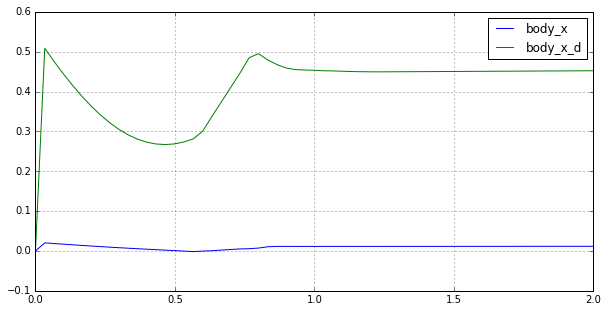

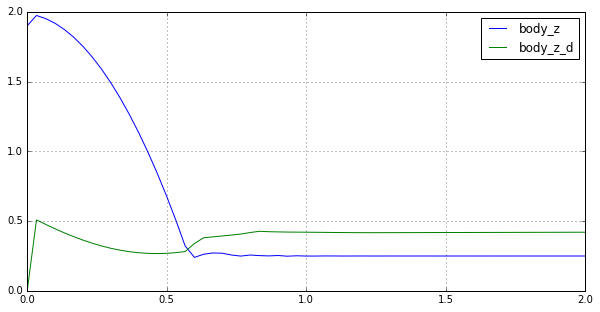

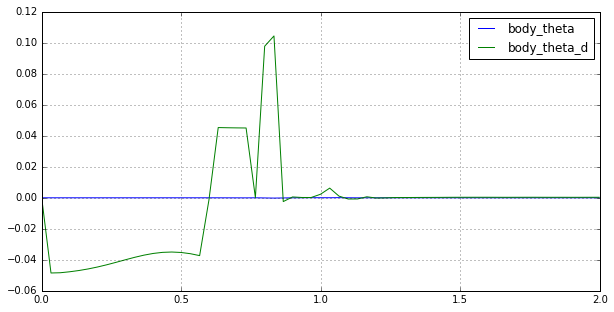

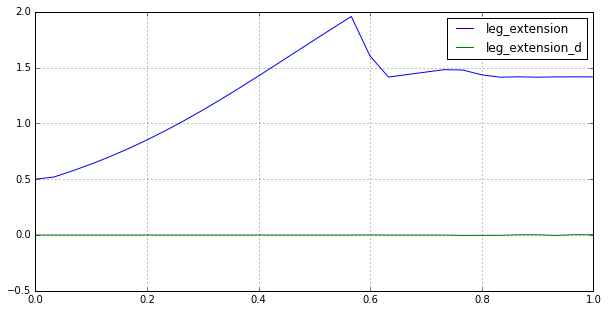

In [3]:
# Plot traces of certain states
plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[0, :])
plt.plot(state_log.sample_times(), state_log.data()[0+5, :])
plt.grid(True)
plt.legend(["body_x", "body_x_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[1, :])
plt.plot(state_log.sample_times(), state_log.data()[1+5, :])
plt.grid(True)
plt.legend(["body_z", "body_z_d"])

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[2, :])
plt.plot(state_log.sample_times(), state_log.data()[2+5, :])
plt.legend(["body_theta", "body_theta_d"])
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(state_log.sample_times(), state_log.data()[4, :])
plt.plot(state_log.sample_times(), state_log.data()[4+5, :])
plt.legend(["leg_extension", "leg_extension_d"])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()